Epoch 1/2
938/938 [==============================] - 69s 72ms/step - loss: 0.1705 - accuracy: 0.9497
Epoch 2/2
313/313 [==============================] - 3s 10ms/step - loss: 0.0457 - accuracy: 0.9855
Test Accuracy: 98.55%
313/313 [==============================] - 4s 14ms/step


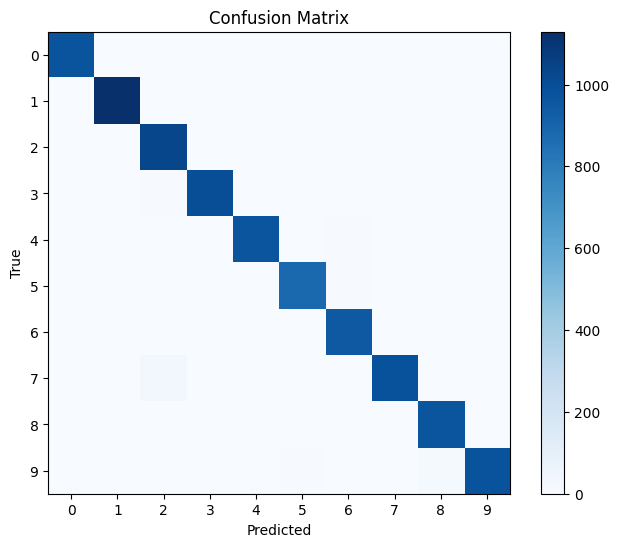

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      1.00      0.97      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=2, batch_size=64)


test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), [str(i) for i in range(10)])
plt.yticks(np.arange(10), [str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

class_names = [str(i) for i in range(10)]
classification_rep = classification_report(np.argmax(test_labels, axis=1), predicted_labels, target_names=class_names)
print(classification_rep)


Below is the Python code that accomplishes these tasks using the Tesseract OCR library and various data analysis tools:

OCR Accuracy: 0.00%


<ipython-input-12-b61c36718236>:70: UserWarning: Glyph 12 () missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


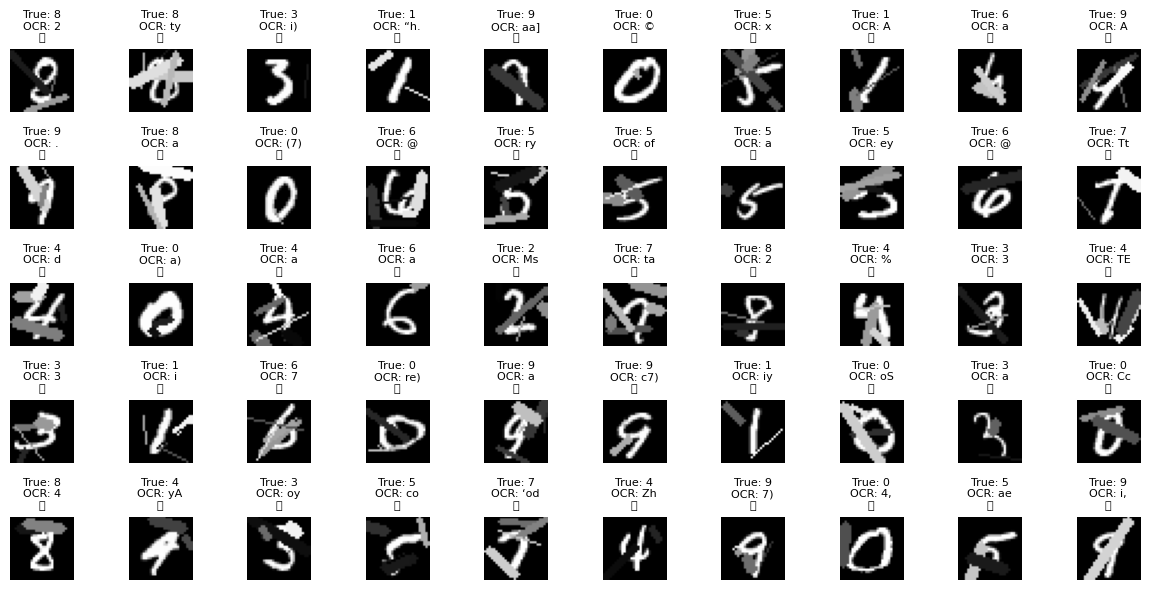

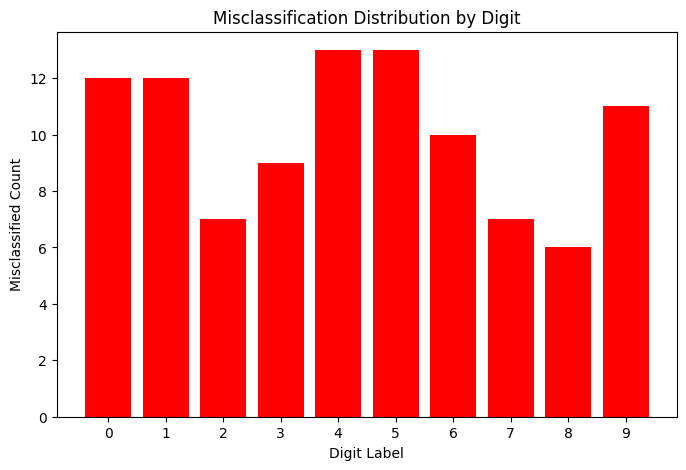

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import pytesseract

# Function to add noise to an image
def add_noise(image, noise_type='random_lines'):
    if noise_type == 'random_lines':
        for _ in range(random.randint(1, 5)):
            x1, y1, x2, y2 = random.randint(0, 27), random.randint(0, 27), random.randint(0, 27), random.randint(0, 27)
            color = random.randint(0, 255)
            thickness = random.randint(1, 3)
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    elif noise_type == 'smudges':
        for _ in range(random.randint(1, 5)):
            x, y = random.randint(0, 27), random.randint(0, 27)
            color = random.randint(0, 255)
            cv2.circle(image, (x, y), random.randint(2, 5), color, -1)
    return image

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Randomly select a subset of 100 images
subset_size = 100
random_indices = random.sample(range(len(test_images)), subset_size)
subset_images = [test_images[i] for i in random_indices]

# Initialize variables for accuracy calculation
correct = 0
total = 0

# Initialize a list to store misclassified digits
misclassified_digits = []

# Perform OCR on the noisy images and calculate accuracy
for i, image in enumerate(subset_images):
    noisy_image = add_noise(image.copy(), noise_type='random_lines')

    # Perform OCR using Tesseract
    ocr_text = pytesseract.image_to_string(noisy_image, config='--psm 10')

    # Extract the ground truth label from the original image
    ground_truth_label = test_labels[random_indices[i]]

    # Check if OCR result matches the ground truth
    if ocr_text == str(ground_truth_label):
        correct += 1
    else:
        misclassified_digits.append((noisy_image, ground_truth_label, ocr_text))
    total += 1

# Calculate accuracy
accuracy = (correct / total) * 100
print(f'OCR Accuracy: {accuracy:.2f}%')

# Visualize the distribution of misclassified digits
if misclassified_digits:
    num_rows = 5
    num_cols = 10
    plt.figure(figsize=(12, 6))
    for i, (noisy_image, ground_truth_label, ocr_text) in enumerate(misclassified_digits):
        if i >= num_rows * num_cols:
            break  # Limit the number of subplots to the available grid size
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(noisy_image, cmap='gray')
        plt.title(f'True: {ground_truth_label}\nOCR: {ocr_text}', fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No misclassified digits.')


if misclassified_digits:
    misclassified_labels = [digit[1] for digit in misclassified_digits]
    plt.figure(figsize=(8, 5))
    plt.hist(misclassified_labels, bins=np.arange(11) - 0.5, rwidth=0.8, align='mid', color='red')
    plt.xticks(range(10))
    plt.xlabel('Digit Label')
    plt.ylabel('Misclassified Count')
    plt.title('Misclassification Distribution by Digit')
    plt.show()


In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Adjust the path as needed
